In [106]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()

In [107]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

In [108]:
df.head()

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [109]:
#df.drop(columns=['Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'],axis=1,inplace=True)

In [110]:
#features=df.iloc[:,:-1].to_numpy()
#dependent_feature=df.iloc[:,-1].to_numpy()
#df1=pd.DataFrame(features)
#df1['salary']=dependent_feature
#df1.columns=df.columns
#df=df1.copy()

In [111]:
#df.salary=pd.to_numeric(df.salary,errors='coerce')

In [112]:
#df.salary.fillna(0,inplace=True)

In [113]:
#df.to_csv('Placement_Data_Full_Class_1.csv')

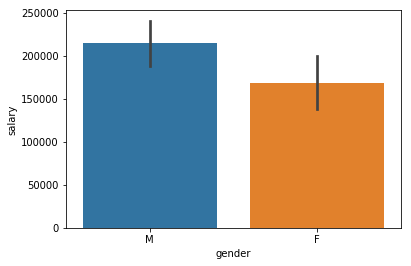

In [114]:
sns.barplot(x=df.gender,y=df.salary)
plt.savefig('Salary_Gender Relationship.eps')

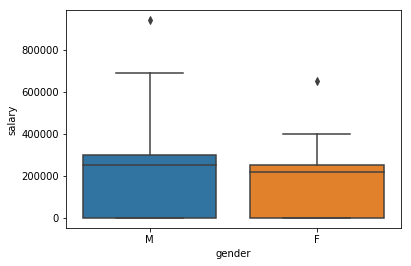

In [115]:
sns.boxplot(y=df.salary,x=df.gender)

In [116]:
#Quantile Calculation
q1=df.salary.quantile(0.25)
q3=df.salary.quantile(0.75)
IQR=q3-q1

In [117]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(-423750.0, 706250.0)

In [118]:
df[(df.salary<lower_limit)|(df.salary>upper_limit)]# outlier present

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


In [119]:
#df=df[(df.salary>lower_limit)&(df.salary<upper_limit)]#after removing outlier

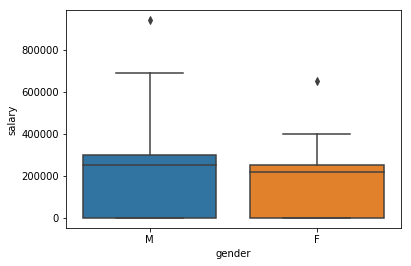

In [120]:
sns.boxplot(y=df.salary,x=df.gender)

In [121]:
df.isnull().sum()

Unnamed: 0        0
sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

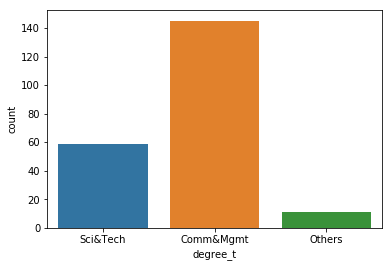

In [122]:
sns.countplot(df.degree_t)

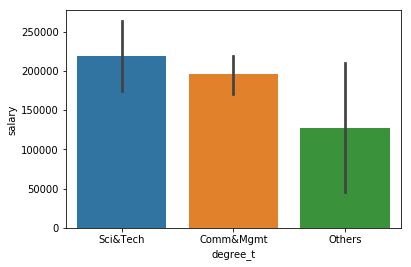

In [123]:
sns.barplot(x=df.degree_t,y=df.salary)

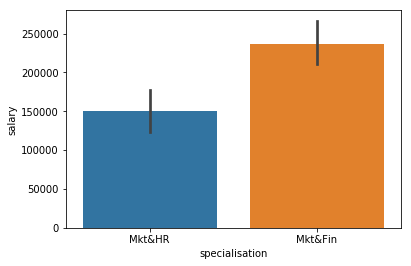

In [124]:
sns.barplot(x=df.specialisation,y=df.salary)

In [125]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [126]:
byGenderdf=pd.DataFrame(df.groupby(['gender','specialisation','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()


In [127]:

fig = px.sunburst(byGenderdf, path=['gender','specialisation','status'], values='no. of students')
fig.update_layout(title="Placement % of mba in each specialisation by gender ",title_x=0.5)
fig.show()
plt.savefig('sunburst Chart for overall data visualization')

<Figure size 432x288 with 0 Axes>

# ho: Gender=Salary: there is no significant relationship b/w gender and salary
# ha:Gender#salary




In [132]:
#gender_df=df.groupby('gender')
Female_ds=df[df['gender']=='F']
Male_ds=df[df['gender']=='M']

In [135]:
Female_ds

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
6,6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
12,12,13,F,47.00,Central,55.00,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
13,13,14,F,77.00,Central,87.00,Central,Commerce,59.00,Comm&Mgmt,No,68.00,Mkt&Fin,68.63,Placed,218000.0
15,15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
17,17,18,F,55.00,Central,67.00,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed,0.0
18,18,19,F,63.00,Central,66.00,Central,Commerce,64.00,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,0.0
21,21,22,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
22,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
23,23,24,F,77.40,Others,60.00,Others,Science,64.74,Sci&Tech,Yes,92.00,Mkt&Fin,63.62,Placed,300000.0
25,25,26,F,52.58,Others,54.60,Central,Commerce,50.20,Comm&Mgmt,Yes,76.00,Mkt&Fin,65.33,Not Placed,0.0


In [130]:
#Female_ds=gender_df.salary.groups['F']
#Male_ds=gender_df.salary.groups['M']

TypeError: cannot perform reduce with flexible type

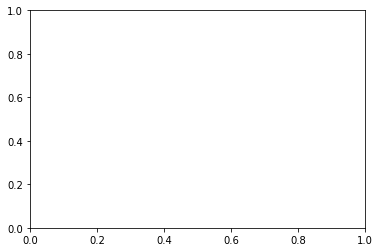

In [131]:
sns.boxplot(Male_ds,orient='v')

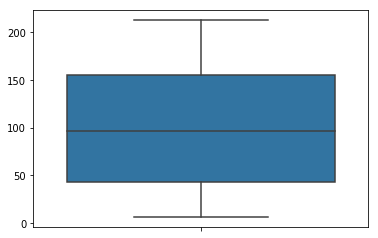

In [25]:
sns.boxplot(Female_ds,orient='v')

In [26]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        np.mean(inp) + np.mean(inp) / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(np.mean(inp)),
    )
    return plt.figure

In [27]:
Male_ds.shape,Female_ds.shape

((138L,), (76L,))

<function matplotlib.pyplot.figure>

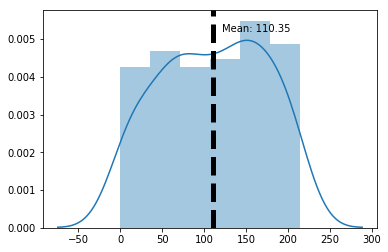

In [28]:
plot_distribution(Male_ds)

<function matplotlib.pyplot.figure>

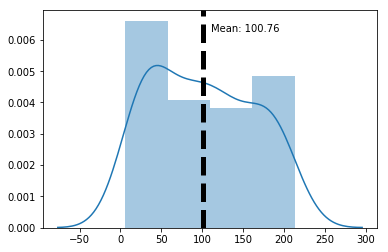

In [29]:
plot_distribution(Female_ds)

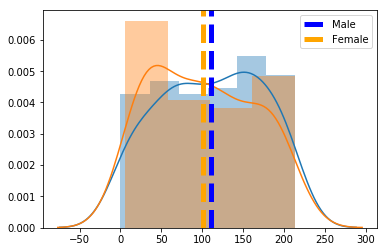

In [30]:
plt.figure()
ax1 = sns.distplot(Male_ds)
ax2 = sns.distplot(Female_ds)
plt.axvline(np.mean(Male_ds), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(Female_ds), color='orange', linestyle='dashed', linewidth=5)
plt.legend(['Male','Female'])


In [31]:
W,p=stats.shapiro(Male_ds)#data is not normally distributed as p value is less than 0.05
W,p

(0.9560036659240723, 0.00021172378910705447)

In [32]:
W,p=stats.shapiro(Female_ds)#data is not normally distribute as p value is less than 0.05
W,p

(0.9368832111358643, 0.0009311971953138709)

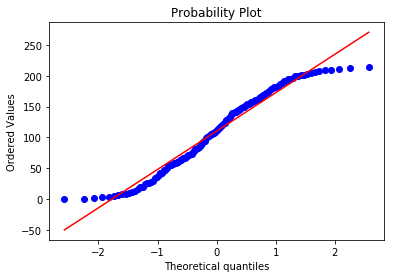

In [33]:
stats.probplot(Male_ds,plot=plt)
plt.show()

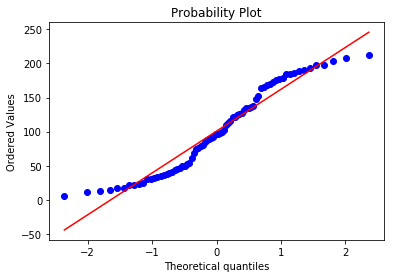

In [34]:
stats.probplot(Female_ds,plot=plt)
plt.show()

In [35]:
stats.levene(Male_ds,Female_ds)#variance are equal as p-value is greater than 0.05

LeveneResult(statistic=0.02203562672466321, pvalue=0.8821334626554007)

In [36]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions-Gender doesnot affect Salaries (fail to reject H0)')
    else:
        print('Different distributions-Gender affect Salaries (reject H0)')

In [37]:
Male_ds.shape

(138L,)

In [38]:
Female_ds.shape

(76L,)

In [39]:
sample_size = 70
female_sampled = np.random.normal(Female_ds, sample_size)
male_sampled = np.random.normal(Male_ds, sample_size)


In [40]:
stats.shapiro(male_sampled)#data is not normally distributed

(0.9837766885757446, 0.10147945582866669)

In [41]:
stats.shapiro(female_sampled)#data is normally distributed

(0.9697713851928711, 0.06643115729093552)

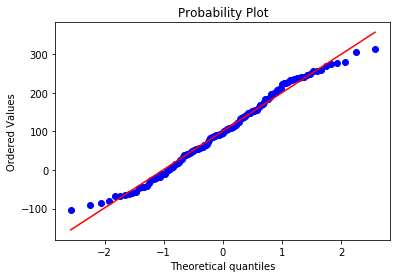

In [42]:
stats.probplot(male_sampled,plot=plt)
plt.show()

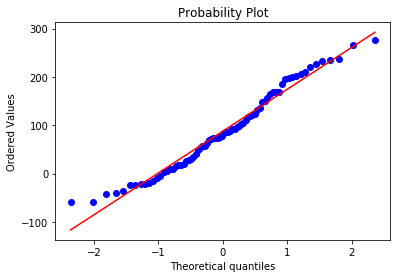

In [43]:
stats.probplot(female_sampled,plot=plt)
plt.show()

In [44]:
stats.levene(male_sampled,female_sampled)

LeveneResult(statistic=1.8922042601606588, pvalue=0.1704051613409722)

In [45]:
compare_2_groups(female_sampled, male_sampled, 0.05, sample_size)

Statistics=-0.958, p=0.339
Same distributions-Gender doesnot affect Salaries (fail to reject H0)


In [46]:
# mann witney u test

In [48]:
stats.mannwhitneyu(Male_ds,Female_ds)

MannwhitneyuResult(statistic=4777.0, pvalue=0.14092793245775936)

# Ho: Stream = placement status(degree_t and status)-significant relationship
# Ha:Stream # placement status(degree_t and status) not significant relationship


In [49]:
pd.crosstab(df.degree_t,df.status)

status,Not Placed,Placed
degree_t,,
Comm&Mgmt,43,101
Others,6,5
Sci&Tech,18,41


In [50]:
#chi square test of indendence
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.degree_t,df.status))[1]

0.2322834672044071

# pvalue is greater than 0.05 hence degree of stream have no effect on placement status

# H0: Speacilaizatin and Status


In [51]:
pd.crosstab(df.specialisation,df.status)

status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,94
Mkt&HR,42,53


In [52]:
#chi square test of indendence
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.specialisation,df.status))[1]

0.0004865063734012338

# pvalue is less than 0.05 hence speacialization have effect on placement status

In [53]:
# H0: Speacilaizatin and salary


In [54]:
speacializatin_df=df.groupby('specialisation')

In [55]:
speacializatin_df.count()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status,salary
specialisation,,,,,,,,,,,,,,
Mkt&Fin,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Mkt&HR,95,95,95,95,95,95,95,95,95,95,95,95,95,95


In [56]:
Fin_ds=speacializatin_df.salary.groups['Mkt&Fin']
HR_ds=speacializatin_df.salary.groups['Mkt&HR']


<function matplotlib.pyplot.figure>

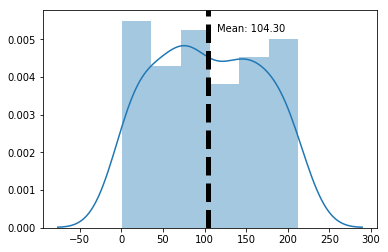

In [57]:
plot_distribution(Fin_ds)

<function matplotlib.pyplot.figure>

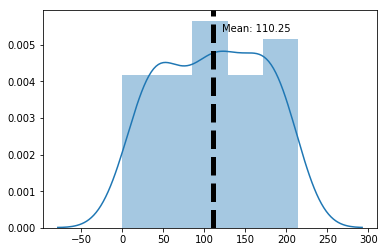

In [58]:
plot_distribution(HR_ds)

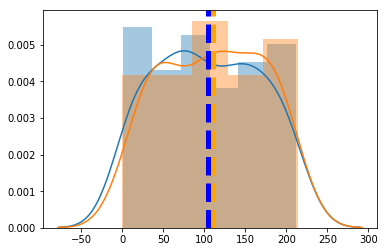

In [59]:
plt.figure()
ax1 = sns.distplot(Fin_ds)
ax2 = sns.distplot(HR_ds)
plt.axvline(np.mean(Fin_ds), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(HR_ds), color='orange', linestyle='dashed', linewidth=5)


In [60]:
Fin_ds.shape,HR_ds.shape

((119L,), (95L,))

In [61]:
def compare_2_groups1(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions-Speacialization doesnot affect Salaries (fail to reject H0)')
    else:
        print('Different distributions-Speacialization affect Salaries (reject H0)')

In [62]:
sample_size = 50
female_sampled = np.random.normal(Fin_ds, sample_size)
male_sampled = np.random.normal(HR_ds, sample_size)
compare_2_groups1(female_sampled, male_sampled, 0.05, sample_size)

Statistics=0.122, p=0.903
Same distributions-Speacialization doesnot affect Salaries (fail to reject H0)


In [63]:
stats.mannwhitneyu(Fin_ds,HR_ds)

MannwhitneyuResult(statistic=5340.0, pvalue=0.2440759241382558)

# H0 : stream of Degree and Salary

In [74]:
stream_df=df.groupby('degree_t')

In [75]:
stream_df.count()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,workex,etest_p,specialisation,mba_p,status,salary
degree_t,,,,,,,,,,,,,,
Comm&Mgmt,144,144,144,144,144,144,144,144,144,144,144,144,144,144
Others,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Sci&Tech,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [76]:
comm_ds=stream_df.salary.groups['Comm&Mgmt']
other_ds=stream_df.salary.groups['Others']
sci_ds=stream_df.salary.groups['Sci&Tech']

In [77]:
comm_ds.shape,other_ds.shape,sci_ds.shape

((144L,), (11L,), (59L,))

<function matplotlib.pyplot.figure>

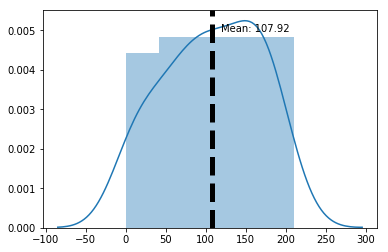

In [78]:
plot_distribution(sci_ds)

<function matplotlib.pyplot.figure>

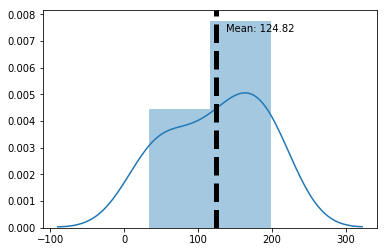

In [79]:
plot_distribution(other_ds)

<function matplotlib.pyplot.figure>

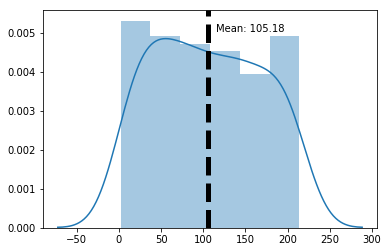

In [80]:
plot_distribution(comm_ds)

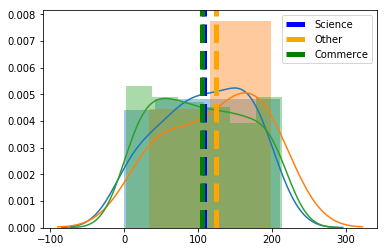

In [81]:
plt.figure()
ax1 = sns.distplot(sci_ds)
ax2 = sns.distplot(other_ds)
ax3=sns.distplot(comm_ds)
plt.axvline(np.mean(sci_ds), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(other_ds), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(comm_ds), color='g', linestyle='dashed', linewidth=5)
plt.legend(['Science','Other','Commerce'])

In [82]:
sci_ds.shape,comm_ds.shape,other_ds.shape

((59L,), (144L,), (11L,))

In [83]:
import scipy.stats as stats
#sci_ds=np.random.normal(sci_ds,50)
#comm_ds=np.random.normal(comm_ds,50)
#other_ds=np.random.normal(other_ds,11)
stats.f_oneway(sci_ds,
               other_ds,
               comm_ds)

F_onewayResult(statistic=0.5144051320556337, pvalue=0.5986039377096759)

In [84]:
stats.kruskal(sci_ds,other_ds,comm_ds)

KruskalResult(statistic=1.0265990276784578, pvalue=0.5985175004825678)

# There is a statistically no significant difference between the degree of stream and their effects the Salary, F= 0.32, p-value= 0.73.

In [85]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [86]:
formula='salary ~ C(specialisation) + C(degree_t) + C(specialisation):C(degree_t)'
model=ols(formula,data=df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(specialisation),3.322941e+11,1.0,16.682990,0.000063
C(degree_t),8.117407e+10,2.0,2.037692,0.132923
C(specialisation):C(degree_t),1.385962e+10,2.0,0.347915,0.706569
Residual,4.142973e+12,208.0,NaN,NaN


In [87]:
byWorkExperiencedf=pd.DataFrame(df.groupby(['workex','degree_t','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()

In [88]:
fig = px.sunburst(byWorkExperiencedf, path=['workex','status','degree_t'], values='no. of students')
fig.update_layout(title="Placement % of degree in each field  by work experience ",title_x=0.5)
fig.show()